<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/NLP_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Playlist link: [https://www.youtube.com/watch?v=fNxaJsNG3-s&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=1&pp=iAQB](https://)

# 1. Tokenization

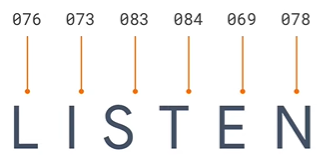

Letters being represented in the form of numbers

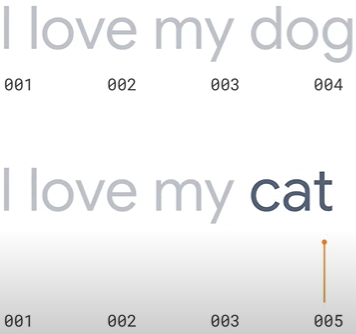

This is how words in a sentences are represented in the form of numbers and a relationship between these words are established based on the numbers.

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
sentences = [
    'i love my dog',
    'i love my cat',
    'you love my dog',
    'do you think my dog is amazing'
]

**num_words**: This parameter specifies the maximum number of words (tokens) to be considered in the vocabulary. In your code, num_words=100 indicates that the tokenizer will keep track of the 100 most frequent words (tokens) in the text data.

When you create a Tokenizer object with the num_words parameter set, the tokenizer will tokenize your text data and create a vocabulary containing the most common words. Words that are not included in the vocabulary will be discarded.

In [20]:
tokenizer = Tokenizer(num_words=100)

In [21]:
tokenizer.fit_on_texts(sentences)

In [22]:
word_index = tokenizer.word_index
print(word_index)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}


# 2. Sequencing

We first assign numerical value to every word, then in a form of list we store the sentences with the numerical values representing different words in the same order.

In [23]:
sequences = tokenizer.texts_to_sequences(sentences)

In [24]:
sequences # this will print the above sentences in form of numbers(sequences)

[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]

Handling words that the tokenizer does not have in its vocabulary

In [25]:
# example
test_data = [
    ' i really love my dog',
    'my dog loves manatee'
]

In [26]:
test_seq = tokenizer.texts_to_sequences(test_data)
test_seq

[[4, 2, 1, 3], [1, 3]]

Therefore, we use a word that we won't expect to find in the sentences, and replace every new word with it, thus retaining the length of the original sentences.

In [29]:
sentences = [
    'i love my dog',
    'i love my cat',
    'you love my dog',
    'do you think my dog is amazing'
]
tokenizer = Tokenizer(num_words = 100, oov_token='<00V>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

test_data = [
    ' i really love my dog',
    'my dog loves manatee'
]
test_seq = tokenizer.texts_to_sequences(test_data)
test_seq

[[5, 1, 3, 2, 4], [2, 4, 1, 1]]

As you can see that the above problem we were facing of text_to_sequences returning different length sequences from the original sentence length.

The words that are not in the vocabulary of the tokenizer, is now replaced with the token '00V' (here given the numerical value as 1)

---
Handling sentences with different length

---



We have to give the model sentences of same length, to solve the problem we can use:

1. Raggid Tensor (advanced method)
2. Padding

In [35]:
from keras.src.utils import pad_sequences
sentences = [
    'i love my dog',
    'i love my cat',
    'you love my dog',
    'do you think my dog is amazing'
]
tokenizer = Tokenizer(num_words = 100, oov_token='<00V>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

test_data = [
    ' i really love my dog',
    'my dog loves manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
padded = pad_sequences(test_seq)

print('without padding:\n', test_seq, '\n')
print('with padding:\n', padded)

without padding:
 [[5, 1, 3, 2, 4], [2, 4, 1, 1]] 

with padding:
 [[5 1 3 2 4]
 [0 2 4 1 1]]


You can add different parameters such as:

1. padding='post' -> this will add the 0 after the end
2. truncating='post' -> this will truncate the sentences after a specified length(maxlen) from the end of the sentence or the start of the sentence.
3. maxlen=5 -> every sentence will have only 5 words.

In [38]:
padded2 = pad_sequences(sequences)

print('without padding:\n', sequences, '\n')
print('with padding:\n', padded2)

without padding:
 [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]] 

with padding:
 [[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


# 3. Training a model to recognize sentiment in text

Each record consists of three attributes:

1. is_sarcastic: 1 if the record is sarcastic otherwise 0

2. headline: the headline of the news article

3. article_link: link to the original news article. Useful for collecting supplementary data

In [1]:
import json

Here we are creating a list called data which stores different object of json as individual dictionary consisting of items.

data


> dictionaries(each dict includes individual label, headline, article_link)

>> dictionary items of the above dictionary
1. label
2. headline
3. article_link



In [11]:
data = []
with open("sarcasm.json", 'r') as f:
    lines = f.readlines()
    for i in lines:
        #print(i)                          # optional - just print it out to explain the next 2 lines
        i = i.replace("'","")              # this is to replace " ' " with ""
        i = i.replace("/n","")          # this is to replace "/n" with ""
        obj = json.loads(i)
        data.append(obj)

In [12]:
data[0]

{'is_sarcastic': 1,
 'headline': 'thirty something scientists unveil doomsday clock of hair loss',
 'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'}

In [14]:
sentences, labels, urls = [], [], []

In [19]:
data[0]['article_link']

'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'

Here we are accessing individual dictionaries in data and adding its items in respective list in same order.

In [22]:
for items in data:
  sentences.append(items['headline'])
  labels.append(items['is_sarcastic'])
  #urls.append(items['article_link'])

In [23]:
len(sentences), len(labels)

(215931, 215931)

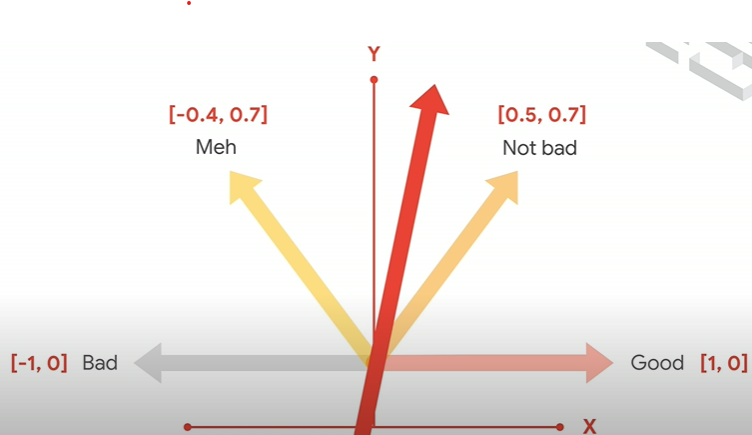

Above is the representation of the concept of ***embedding***.

Where words with similar meaning are represented close by, thus having lesser angle of inclination between them, whereas words with opposite meaning will be exactly opposite vector representation of each other.

Here the vector representation is stored in the format of (x,y) points.

Above is 2-D representation, in actual the representation is in multi-dimenional form.

Performing train_test_split

In [55]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = int(0.87*len(sentences))

In [56]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [57]:
len(training_sentences), len(testing_sentences), len(training_labels), len(testing_labels)

(187859, 28072, 187859, 28072)

In [70]:
import pandas as pd
print(pd.DataFrame(labels).value_counts())
print(pd.DataFrame(training_labels).value_counts())
print(pd.DataFrame(testing_labels).value_counts())

0    113222
1    102709
dtype: int64
0    98433
1    89426
dtype: int64
0    14789
1    13283
dtype: int64


In [71]:
(102709/113222)*100

90.71470208969988

In [72]:
(89426/98433)*100

90.84961344264627

In [73]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

Fitting the tokenizer only on training sentences, as the model should not be exposed to the testing data

In [76]:
tokenizer.fit_on_texts(training_sentences)

In [77]:
word_index = tokenizer.word_index
print(word_index)
print(len(word_index))

{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'with': 9, 'and': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'at': 15, 'from': 16, 'about': 17, 'you': 18, 'by': 19, 'this': 20, 'after': 21, 'up': 22, 'be': 23, 'as': 24, 'out': 25, 'how': 26, 'that': 27, 'it': 28, 'not': 29, 'his': 30, 'he': 31, 'are': 32, 'will': 33, 'who': 34, 'just': 35, 'your': 36, 'what': 37, 'has': 38, 'all': 39, 'report': 40, 'into': 41, 'more': 42, 'year': 43, 'have': 44, 'one': 45, 'why': 46, 'over': 47, 'area': 48, 's': 49, 'day': 50, 'woman': 51, 'u': 52, 'says': 53, 'first': 54, 'no': 55, 'can': 56, 'time': 57, 'donald': 58, 'get': 59, 'its': 60, 'like': 61, 'now': 62, 'old': 63, 'her': 64, 'i': 65, 'life': 66, 'obama': 67, 'people': 68, 'an': 69, 'off': 70, 'still': 71, 'make': 72, 'back': 73, 'trumps': 74, 'than': 75, 'was': 76, 'house': 77, 'if': 78, '5': 79, 'down': 80, 'white': 81, 'years': 82, 'we': 83, 'they': 84, 'world': 85, 'could': 86, 'my': 87, 'clinton': 88, 'a

In [78]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)

In [80]:
training_sequences[0:10]

[[1, 336, 323, 2950, 4470, 2192, 3, 629, 1269],
 [1, 2375, 845, 3675, 46, 242, 11, 2243, 964, 8, 1349, 1993, 2062],
 [952, 36, 1, 275, 1, 739, 1167],
 [1, 1389, 7011, 1, 16, 136, 2, 164],
 [525, 534, 302, 938, 2, 501, 563, 5639, 7012],
 [87, 81, 7966],
 [79, 269, 2, 4054, 36, 3005, 9, 455, 1322],
 [1964, 1, 832, 5570, 4362, 1461, 24, 254, 24, 1494, 3, 1381, 2884, 5360],
 [3757, 343, 136, 133, 1994, 2, 596, 5, 1, 2725, 384, 1495],
 [4256, 3, 158, 128, 20, 1]]

In [81]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

Padding the sequences

In [93]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

In [94]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [95]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adamax',metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 24)                408       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [98]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
5871/5871 - 28s - loss: 0.5016 - accuracy: 0.7596 - val_loss: 0.3505 - val_accuracy: 0.8594 - 28s/epoch - 5ms/step
Epoch 2/30
5871/5871 - 29s - loss: 0.2933 - accuracy: 0.8857 - val_loss: 0.2604 - val_accuracy: 0.8978 - 29s/epoch - 5ms/step
Epoch 3/30
5871/5871 - 26s - loss: 0.2186 - accuracy: 0.9185 - val_loss: 0.2203 - val_accuracy: 0.9166 - 26s/epoch - 4ms/step
Epoch 4/30
5871/5871 - 26s - loss: 0.1785 - accuracy: 0.9358 - val_loss: 0.1958 - val_accuracy: 0.9261 - 26s/epoch - 4ms/step
Epoch 5/30
5871/5871 - 25s - loss: 0.1545 - accuracy: 0.9452 - val_loss: 0.1843 - val_accuracy: 0.9304 - 25s/epoch - 4ms/step
Epoch 6/30
5871/5871 - 25s - loss: 0.1396 - accuracy: 0.9501 - val_loss: 0.1756 - val_accuracy: 0.9347 - 25s/epoch - 4ms/step
Epoch 7/30
5871/5871 - 25s - loss: 0.1280 - accuracy: 0.9545 - val_loss: 0.1771 - val_accuracy: 0.9352 - 25s/epoch - 4ms/step
Epoch 8/30
5871/5871 - 26s - loss: 0.1202 - accuracy: 0.9577 - val_loss: 0.1689 - val_accuracy: 0.9378 - 26s/epoch - 4

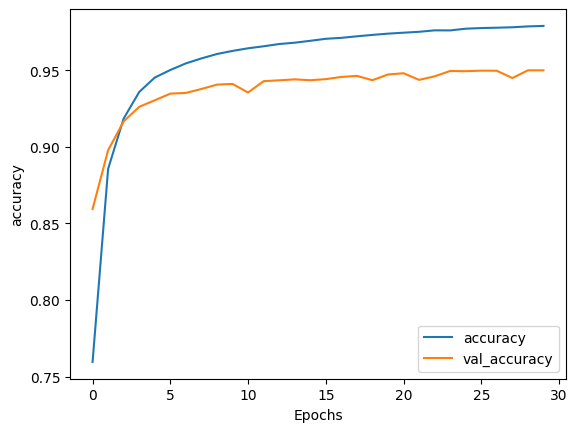

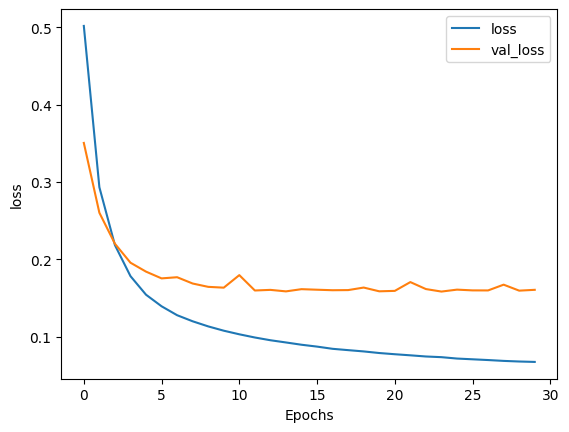

In [99]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Decoding the padded sequence -> original sentence by inversing the (int,word) pair of word_index to (word,int) pair.

Basically in padded sequence, we have numbers, which we map to individual words in word_index and get the sentence in the form of words back.

The padding integer, i.e., 0, is replaced with '?'

In [101]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

eat your <OOV> 9 <OOV> different recipes ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
eat your veggies: 9 deliciously different recipes
0


Downloads the words

In [ ]:
'''e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')'''

In [102]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 314ms/step
[[0.7628026]
 [0.0771113]]
